In [1]:
import torch

import pandas as pd

from utilities.functions import train_model, plot_loss
from utilities.dataloaders import news_loader
from utilities.models import news_classifier


In [2]:
# initializing some constants
DEVICE = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")
EPOCH = 100
BATCH_SIZE = 64
NUM_CLASSES = 15
LR = 1e-5


In [3]:
# load the data
news_df = pd.read_csv('data/stories_clean.csv')

# create dataloaders and vocabulary
vocab, train_loder, val_loader = news_loader(news_df, batch_size=BATCH_SIZE)

# create model
model = news_classifier(lstm_layers=2,
                        hidden_dim=256,
                        embedding_dim=64,
                        device=DEVICE,
                        vocab_size=len(vocab),
                        num_classes=NUM_CLASSES,
                        batch_size=BATCH_SIZE)


In [4]:
# training the model
results = train_model([model, 'news_classifier'],
                      train_loder, val_loader, vocab, DEVICE, lr=LR, epoch=10)


TRAINING [001/010]


100%|██████████| 72/72 [00:05<00:00, 13.96it/s]


	[ Train | 001/010 ] Loss = 0.75647
	learning rate 0.000010
VALIDATION [001/010]


100%|██████████| 9/9 [00:00<00:00, 29.22it/s]


	[ Valid | 001/010 ] Loss = 0.69479 -> New best performance!
		Saving this model in './trained_models/news_classifier/best_model.pth'
TRAINING [002/010]


100%|██████████| 72/72 [00:05<00:00, 13.89it/s]


	[ Train | 002/010 ] Loss = 0.75629
	learning rate 0.000009
VALIDATION [002/010]


100%|██████████| 9/9 [00:00<00:00, 29.05it/s]


	[ Valid | 002/010 ] Loss = 0.69588
TRAINING [003/010]


100%|██████████| 72/72 [00:05<00:00, 14.37it/s]


	[ Train | 003/010 ] Loss = 0.75605
	learning rate 0.000008
VALIDATION [003/010]


100%|██████████| 9/9 [00:00<00:00, 29.66it/s]


	[ Valid | 003/010 ] Loss = 0.69619
TRAINING [004/010]


100%|██████████| 72/72 [00:04<00:00, 14.59it/s]


	[ Train | 004/010 ] Loss = 0.75590
	learning rate 0.000007
VALIDATION [004/010]


100%|██████████| 9/9 [00:00<00:00, 28.65it/s]


	[ Valid | 004/010 ] Loss = 0.69700
TRAINING [005/010]


100%|██████████| 72/72 [00:05<00:00, 14.36it/s]


	[ Train | 005/010 ] Loss = 0.75574
	learning rate 0.000005
VALIDATION [005/010]


100%|██████████| 9/9 [00:00<00:00, 26.11it/s]


	[ Valid | 005/010 ] Loss = 0.69743
TRAINING [006/010]


100%|██████████| 72/72 [00:05<00:00, 14.25it/s]


	[ Train | 006/010 ] Loss = 0.75547
	learning rate 0.000003
VALIDATION [006/010]


100%|██████████| 9/9 [00:00<00:00, 28.65it/s]


	[ Valid | 006/010 ] Loss = 0.69749
TRAINING [007/010]


100%|██████████| 72/72 [00:05<00:00, 13.59it/s]


	[ Train | 007/010 ] Loss = 0.75538
	learning rate 0.000002
VALIDATION [007/010]


100%|██████████| 9/9 [00:00<00:00, 27.61it/s]


	[ Valid | 007/010 ] Loss = 0.69761
TRAINING [008/010]


100%|██████████| 72/72 [00:05<00:00, 13.13it/s]


	[ Train | 008/010 ] Loss = 0.75523
	learning rate 0.000001
VALIDATION [008/010]


100%|██████████| 9/9 [00:00<00:00, 26.16it/s]


	[ Valid | 008/010 ] Loss = 0.69808
TRAINING [009/010]


100%|██████████| 72/72 [00:05<00:00, 12.95it/s]


	[ Train | 009/010 ] Loss = 0.75508
	learning rate 0.000000
VALIDATION [009/010]


100%|██████████| 9/9 [00:00<00:00, 21.96it/s]


	[ Valid | 009/010 ] Loss = 0.69836
TRAINING [010/010]


100%|██████████| 72/72 [00:05<00:00, 12.14it/s]


	[ Train | 010/010 ] Loss = 0.75510
	learning rate 0.000000
VALIDATION [010/010]


100%|██████████| 9/9 [00:00<00:00, 22.84it/s]

	[ Valid | 010/010 ] Loss = 0.69864


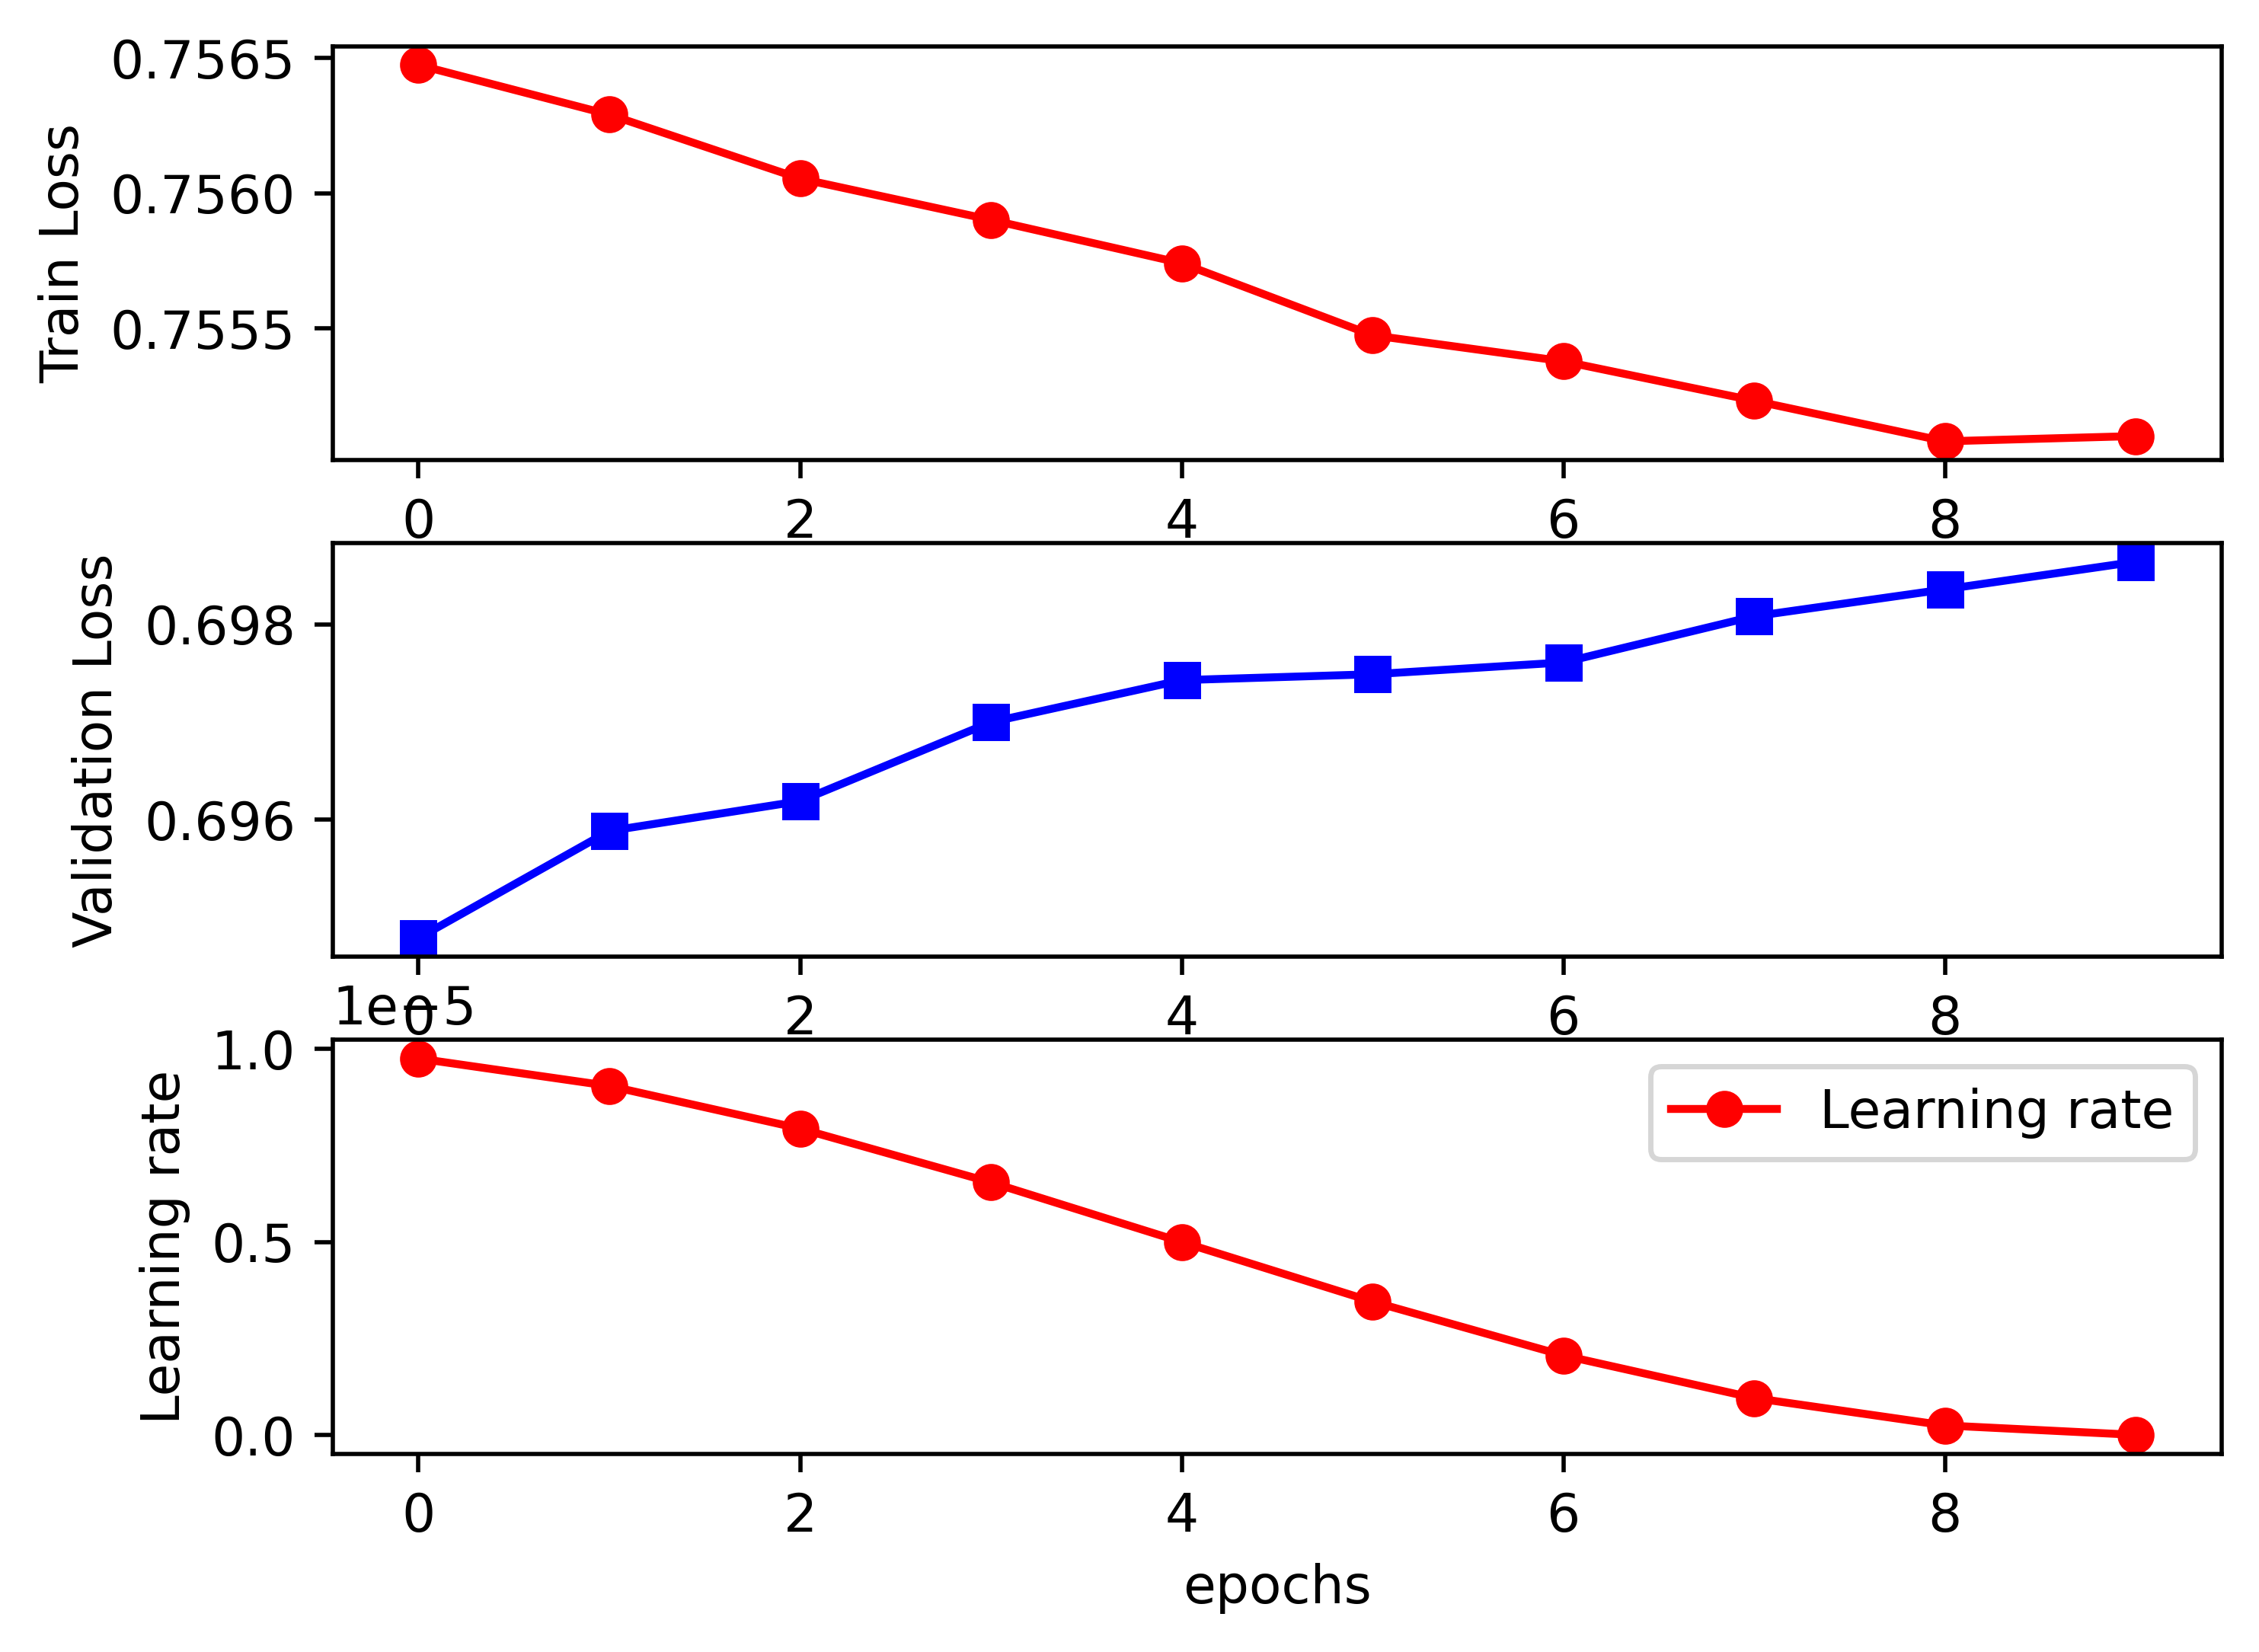

In [5]:
# plotting the results
plot_loss(**results)
